In [1]:
import cPickle as pkl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
with open('sub-0001_ses-02.pkl', 'rb') as f:
    D = pkl.load(f)
import sys
sys.path.append('../../../docker/panda')
import methods.misc as misc
import methods.denoise as den
import methods.bad_chans as bad_chans
import methods.interpolation as interp
fs = [misc.setup, den.highpass, bad_chans.bad_detec]
p_global =  {
         'hpf': {
             'order': 4,
             'Fs': 500,
             'cutoff': .1
         },
        'bad_detec': {
            'thresh': 3,
            'measure': ['prob', 'kurtosis'],
            'normalize': 0,
            'discret': 1000,
            'verbose': False,
            'trim': None
        },
        'inter': {
            'loc_unit': 'radians',
            'verbose': False,
            'k': 3,
            's' : 1000,
            'wave': 'db2'
        },
        'sample_freq': 500,
        'eog_chans': [48, 49, 56, 63, 68,
                      73, 81, 88, 94, 99,
                      107, 113, 119, 125,
                      125, 126, 127, 128]
}
p_local = {'funct': None,
           'fig_path': None,
           'eog_in': True}

with open("./chan_locs.pkl", 'rb') as file_handle:
    chan_locs = pkl.load(file_handle)
p_global['inter'].update({'chan_locs': chan_locs})

### Run everything up to Interpolation

In [2]:
Ds = []
curr = (D, p_local)
plocs = []
for f in fs:
    funct = f.__name__
    curr[1]['funct'] = funct
    print 'Running function', funct
    curr = f(*curr, p_global = p_global)
    Ds.append(curr[0])
    plocs.append(curr[1])

Running function setup
Running function highpass
Running function bad_detec
[8 9]
0.0


In [3]:
def sym_log(c):
    def f(x):
        return np.sign(x) * np.log(1 + np.abs(x / c))
    return f

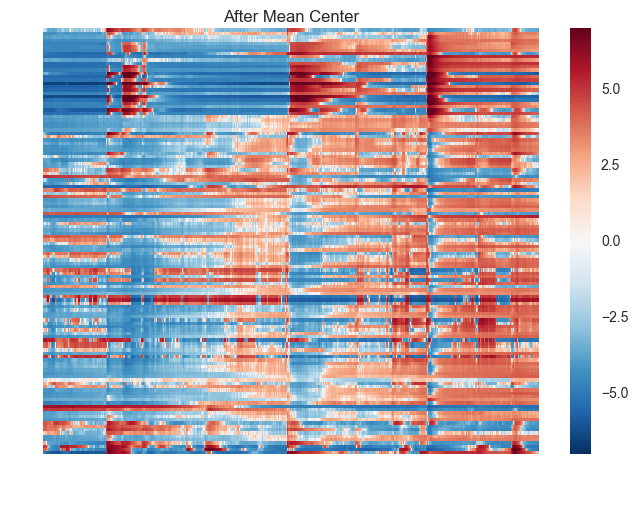

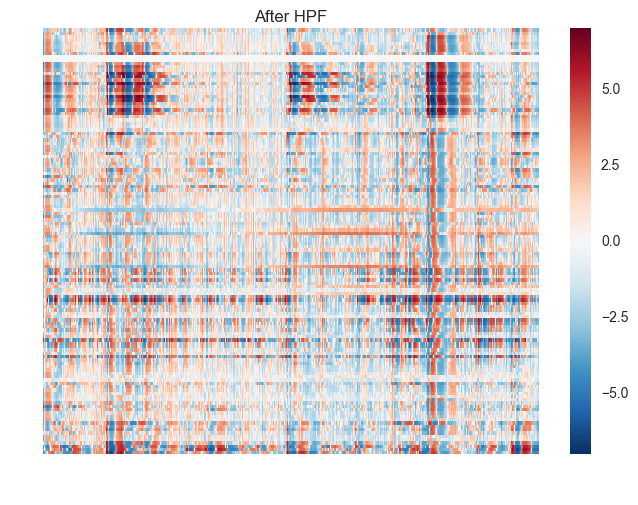

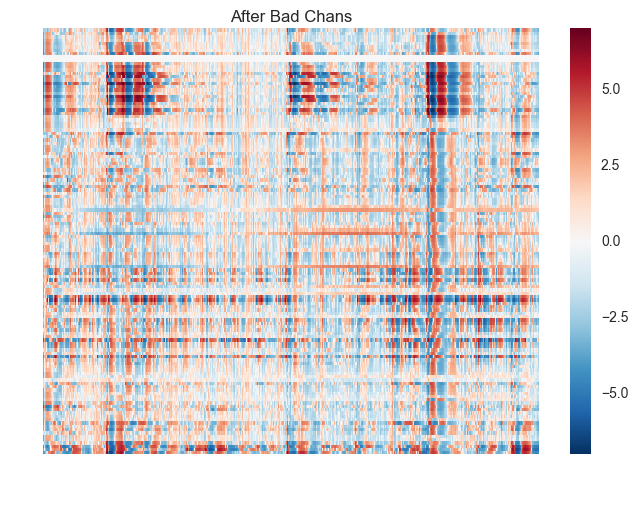

In [4]:
sl = sym_log(5)
sns.heatmap(sl(Ds[0][:, ::100]), vmin = -7, vmax = 7)
plt.axis('off')
plt.title('After Mean Center')
plt.show()
sns.heatmap(sl(Ds[1][:, ::100]), vmin = -7, vmax = 7)
plt.axis('off')
plt.title('After HPF')
plt.show()
sns.heatmap(sl(Ds[2][:, ::100]), vmin = -7, vmax = 7)
plt.axis('off')
plt.title('After Bad Chans')
plt.show()

In [21]:
Ds[-1][np.array([8, 9]), :] = 0
TMP = copy.deepcopy(Ds[-1])

In [20]:
import copy
pg = copy.deepcopy(p_global)
pg['inter']['s'] = 100
funct = f.__name__
pl = copy.deepcopy(plocs[-1])
pl['funct'] = funct
nw = interp.ssinterp(*(TMP, pl), p_global = pg)

In [6]:
def make_lines(D, bcs):
    for c in bcs:
        plt.plot(D[c, :])
    plt.show()

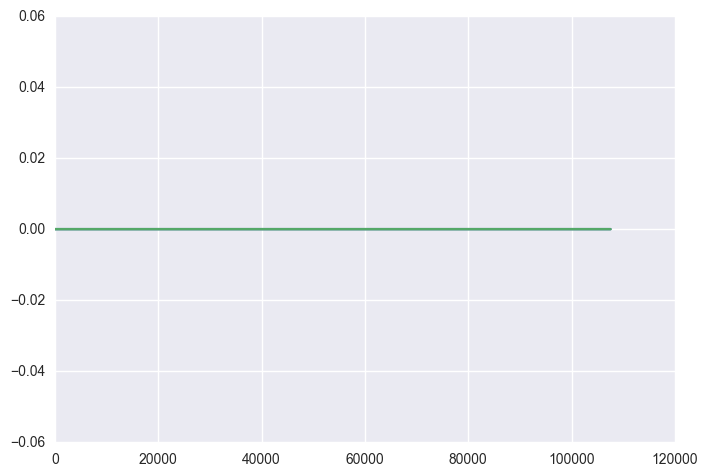

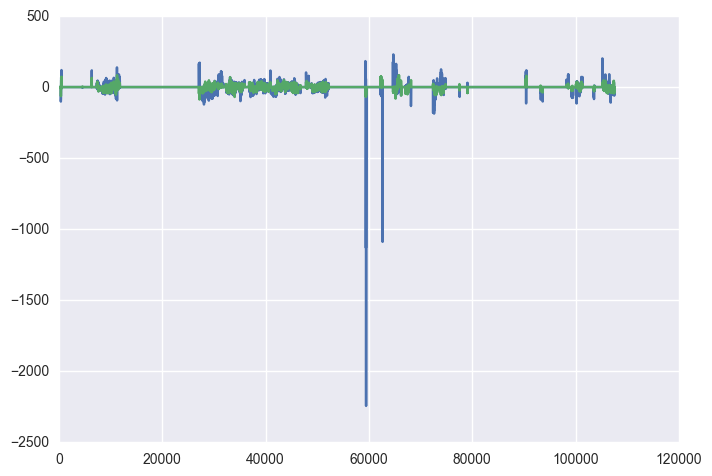

In [16]:
#10000
make_lines(TMP, [8, 9])
make_lines(nw[0], [8, 9])

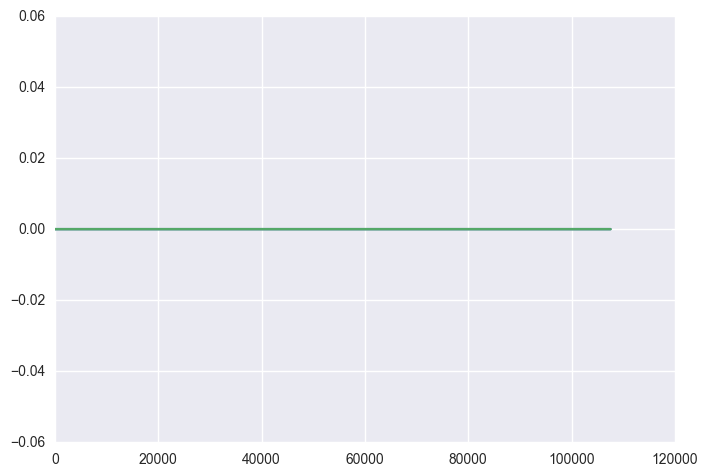

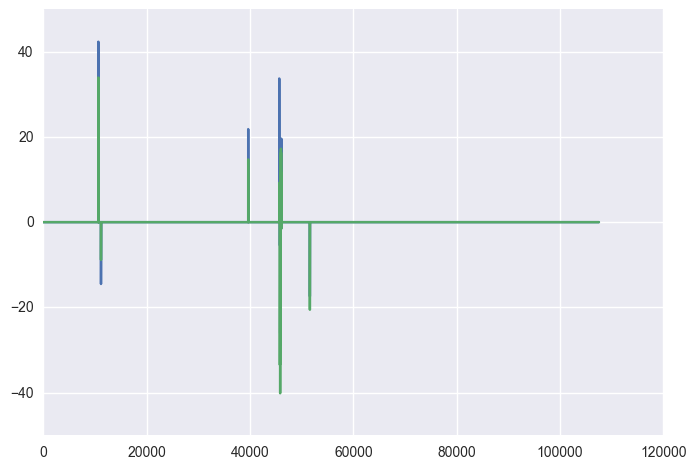

In [19]:
#1000
make_lines(TMP, [8, 9])
make_lines(nw[0], [8, 9])

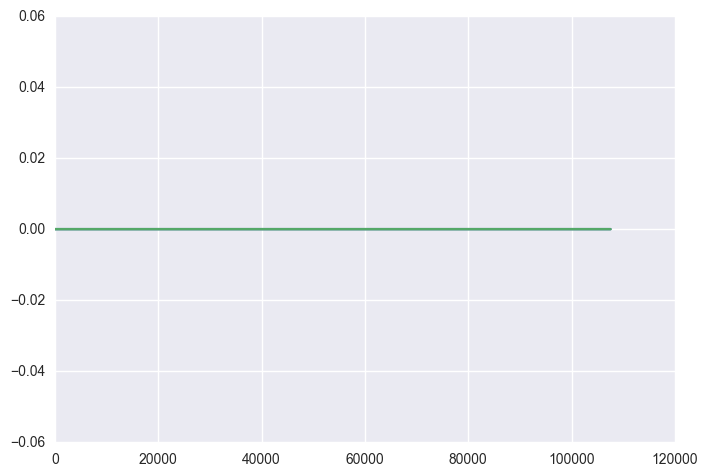

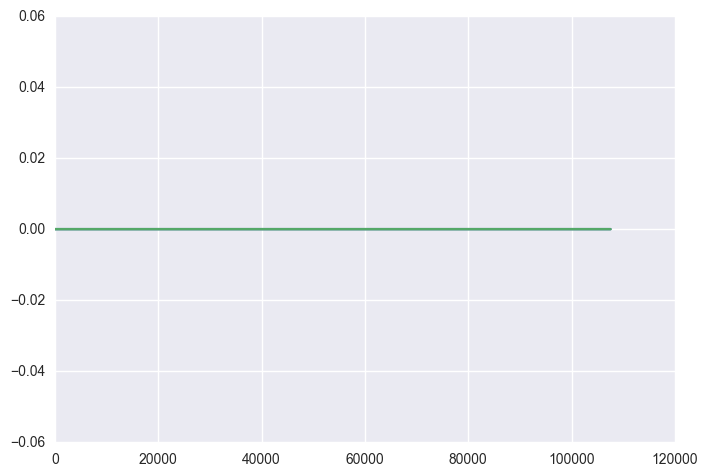

In [22]:
#100
make_lines(TMP, [8, 9])
make_lines(nw[0], [8, 9])